In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../../src/')

In [3]:
import numpy as np
from PIL import Image

In [4]:
import matplotlib.pyplot as plt

In [16]:
from models.chen2017.transforms import *
import datasets.divahisdb as diva
import experiment.data as exd
from datasets.array import Tiles
import math
import torch

In [17]:
env = exd.Environment()

In [67]:
diva_dataset = diva.HisDBDataset(env.dataset('DIVA-HisDB'),gt=True)

In [73]:
tile_data = Tiles(env.dataset('Chen2017_np_tiles_balanced'))

In [161]:
tile_data.y

array([0, 0, 0, ..., 3, 3, 3])

In [165]:
class_count = np.unique(tile_data.y, return_counts=True)[1] 
class_count / sum(class_count)

array([0.34490159, 0.00584502, 0.34490159, 0.3043518 ])

In [64]:
n_label_max = sorted(np.unique(tile_data.data['y'], return_counts=True)[1])[-2]
idx = np.where(tile_data.y == 0)[0]
np.random.shuffle(idx)
idx = idx[:n_label_max]
idx = np.append(idx,np.where(tile_data.y == 1)[0][:n_label_max])
idx = np.append(idx,np.where(tile_data.y == 2)[0][:n_label_max])
idx = np.append(idx,np.where(tile_data.y == 3)[0][:n_label_max])
# tile_data.x[(idx[:10],)].shape

tile_data.y[idx]
np.unique(tile_data.y[idx], return_counts=True)
# idx
# n_label_max

(array([0, 1, 2, 3]), array([7553,  128, 7553, 6665]))

0

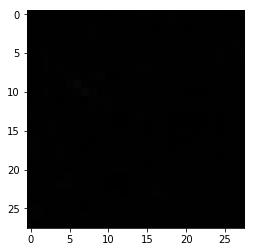

In [33]:
i = 76008
plt.imshow(tile_data[i][0],'gray')
tile_data[i][1]

In [77]:
std = np.std(tile_data.x)
mean = np.mean(tile_data.x)

In [79]:
mean, std

(168.61987390394304, 56.83193208713197)

In [59]:
type(tile_data.data['x'][2])

numpy.ndarray

In [61]:

tile_data.data.keys()

['x', 'y']

In [24]:
tile_data[i][0]

In [90]:
from models.chen2017.chennet import ChenNet as Model
model = Model(n_classes=4, in_channels=1, layers=1)

In [91]:
np.histogram(model.conv.conv0.weight.data)

(array([5, 2, 3, 5, 5, 3, 2, 6, 1, 4]),
 array([-0.33046457, -0.26410752, -0.19775047, -0.13139341, -0.06503636,
         0.00132069,  0.06767774,  0.13403479,  0.20039185,  0.2667489 ,
         0.33310595]))

In [92]:
model.conv

Sequential(
  (dropout): Dropout(p=0.5)
  (conv0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
)

In [94]:
tile_data.y

array([0, 0, 0, ..., 3, 3, 3])

In [118]:
np.sum(tile_data.y !=np.random.randint(0,4, size=tile_data.y.shape)) / len(tile_data.y)

0.7484360016439107

In [119]:

import json
import os
from pathlib import Path

import torch
import torchvision
import torchvision.transforms as transforms
from inferno.trainers.basic import Trainer
from inferno.trainers.callbacks.logging.tensorboard import TensorboardLogger

from models.chen2017.chennet import ChenNet as Model
import datasets.array as array
from experiment.data import Environment, TrainLog

env = Environment()
dataset_name  = 'Chen2017_np_tiles_balanced'
dataset_path = env.dataset(dataset_name)

mean =168.61987390394304
std =56.83193208713197

transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((mean, mean, mean), (std,std,std))
    ])

train_set = array.Tiles(dataset_path, transforms=transform)
test_set = array.Tiles(dataset_path, train=False, transforms=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32,
                                           shuffle=True, num_workers=2)

/home/jakob/miniconda3/envs/master/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [159]:
train_loader?

Type:        DataLoader
String form: <torch.utils.data.dataloader.DataLoader object at 0x7fe961ce6e10>
Length:      685
File:        ~/miniconda3/envs/master/lib/python3.6/site-packages/torch/utils/data/dataloader.py
Docstring:  
Data loader. Combines a dataset and a sampler, and provides
single- or multi-process iterators over the dataset.

Arguments:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: 1).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: False).
    sampler (Sampler, optional): defines the strategy to draw samples from
        the dataset. If specified, ``shuffle`` must be False.
    batch_sampler (Sampler, optional): like sampler, but returns a batch of
        indices at a time. Mutually exclusive with batch_size, shuffle,
        sampler, and drop_last.
    num_workers (int, optional): how many subprocesses to use fo

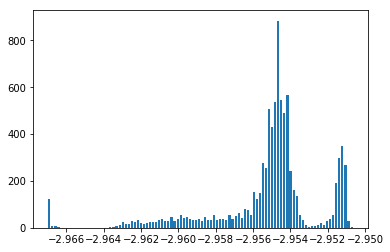

In [207]:
# plt.imshow(batch[0][0,0])
batch[1][0]
hist, bins = np.histogram(batch[0][:,0],bins=100)
# batch[0][:,0].shape
# plt.bar(hist[1],hist[0])
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
# plt.ylim([0,50])
plt.show()

In [212]:
# model = Model(n_classes=4, in_channels=1, layers=2)
loaded.model(torch.autograd.Variable(batch[0]).cuda())
# batch[1]

Variable containing:
 0.3108  0.0142  0.3459  0.3292
 0.3484  0.0215  0.3353  0.2948
 0.2906  0.0140  0.3795  0.3160
 0.3408  0.0226  0.3515  0.2850
 0.3338  0.0147  0.3496  0.3018
 0.3381  0.0136  0.3565  0.2918
 0.3551  0.0056  0.3323  0.3070
 0.3452  0.0202  0.3048  0.3298
 0.3641  0.0135  0.3410  0.2814
 0.3295  0.0060  0.3431  0.3214
 0.3005  0.0163  0.3431  0.3402
[torch.cuda.FloatTensor of size 11x4 (GPU 0)]

In [208]:
loaded = Trainer()
loaded = loaded.load(from_directory=str(env.models_folder/ 'ChenNet'/'Chen2017_np_tiles_balanced'/'trained'/'ChenNet2_4_01522872669'), filename='latest')

In [209]:
env.models_folder

PosixPath('/media/jakob/bigdata/models/thesis')

In [210]:
!ls /media/jakob/bigdata/models/thesis/ChenNet/Chen2017_np_tiles_balanced/trained/ChenNet2_4_01522868516/

latest


In [219]:
img_set = array.Tiles(dataset_path)
img_set[10][0]